In [1]:
#read in the data from vgsales.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression

#ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Video_Games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#remove any null values
df = df.dropna()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
#drop the columns name, EU_Sales, Other_Sales
df = df.drop(['Name', 'EU_Sales', 'Other_Sales'], axis=1)

#categorize the Global sales into more than 2 million sales and less than 2 million sales
df['Global_Sales'] = df['Global_Sales'].apply(lambda x: 1 if x > 2 else 0)

#categorize the Global_Sales column into quartiles
# df['Global_Sales'] = pd.qcut(df['Global_Sales'], 4, labels=False)

#rename the Year_of_Release column to Year
df = df.rename(columns={'Year_of_Release': 'Year'})


df.head()

,Platform,Year,Genre,Publisher,NA_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,3.77,1,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,3.79,1,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,3.28,1,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,6.50,1,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,2.93,1,58.0,41.0,6.6,129.0,Nintendo,E


In [5]:
#create a list of the headers of all numerical columns
numerical_columns = ['NA_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

#create a list of the headers of all categorical columns
categorical_columns = ['Platform', 'Year', 'Genre', 'Publisher', 'Developer', 'Rating']

target_column = 'Global_Sales'

df_imputed = copy.deepcopy(df)

# define vars to encode as integer    
encoders = dict()

# encode categorical columns
for col in categorical_columns:
    # integer encode strings that are features
    encoders[col] = LabelEncoder() # save the encoder
    df_imputed[col+'_int'] = encoders[col].fit_transform(df_imputed[col])

# scale numerical columns
scaler = StandardScaler()
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

df_imputed.head()

,Platform,Year,Genre,Publisher,NA_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_int,Year_int,Genre_int,Publisher_int,Developer_int,Rating_int
0,Wii,2006.0,Sports,Nintendo,42.349741,12.887711,1,0.413044,1.148059,0.565602,0.250734,Nintendo,E,12,14,10,160,771,1
2,Wii,2008.0,Racing,Nintendo,15.802014,12.957265,1,0.845709,2.292536,0.773959,0.909586,Nintendo,E,12,16,6,160,771,1
3,Wii,2009.0,Sports,Nintendo,15.729649,11.183651,1,0.701487,2.292536,0.565602,0.029415,Nintendo,E,12,17,10,160,771,1
6,DS,2006.0,Platform,Nintendo,11.253338,22.381762,1,1.350484,1.876363,0.912863,0.436302,Nintendo,E,2,14,4,160,771,1
7,Wii,2006.0,Misc,Nintendo,14.023895,9.966465,1,-0.884950,0.627843,-0.406731,-0.077840,Nintendo,E,12,14,3,160,771,1


In [6]:
categorical_headers_ints = [x+'_int' for x in categorical_columns]
feature_headers = numerical_columns + categorical_headers_ints
feature_headers

['NA_Sales',
 'JP_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Platform_int',
 'Year_int',
 'Genre_int',
 'Publisher_int',
 'Developer_int',
 'Rating_int']

In [7]:
print("\nCategorical String Headers: ", categorical_columns)
print("\nCategorical Integer Headers: ", categorical_headers_ints)


Categorical String Headers:  ['Platform', 'Year', 'Genre', 'Publisher', 'Developer', 'Rating']

Categorical Integer Headers:  ['Platform_int', 'Year_int', 'Genre_int', 'Publisher_int', 'Developer_int', 'Rating_int']


In [8]:
#split the data into X and y
X = df_imputed[feature_headers].to_numpy()
y = df_imputed['Global_Sales'].values

#check the shape of X and y
print(X.shape)
print(y.shape)


(6825, 12)
(6825,)


In [9]:
num_instances = len(y)
cv_object = StratifiedKFold(n_splits=10)

for df_train, df_test in cv_object.split(X,y): 
    X_train = X[df_train]
    y_train = y[df_train]
    
    X_test = X[df_test]
    y_test = y[df_test]

#check the shape of x_train and y_train
print(X_train.shape)
print(y_train.shape)

#check the shape of x_test and y_test
print(X_test.shape)
print(y_test.shape)

#test the accuracy of the model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


(6143, 12)
(6143,)
(682, 12)
(682,)
Accuracy:  0.9486803519061584


Recall score average: 78.39285714285714


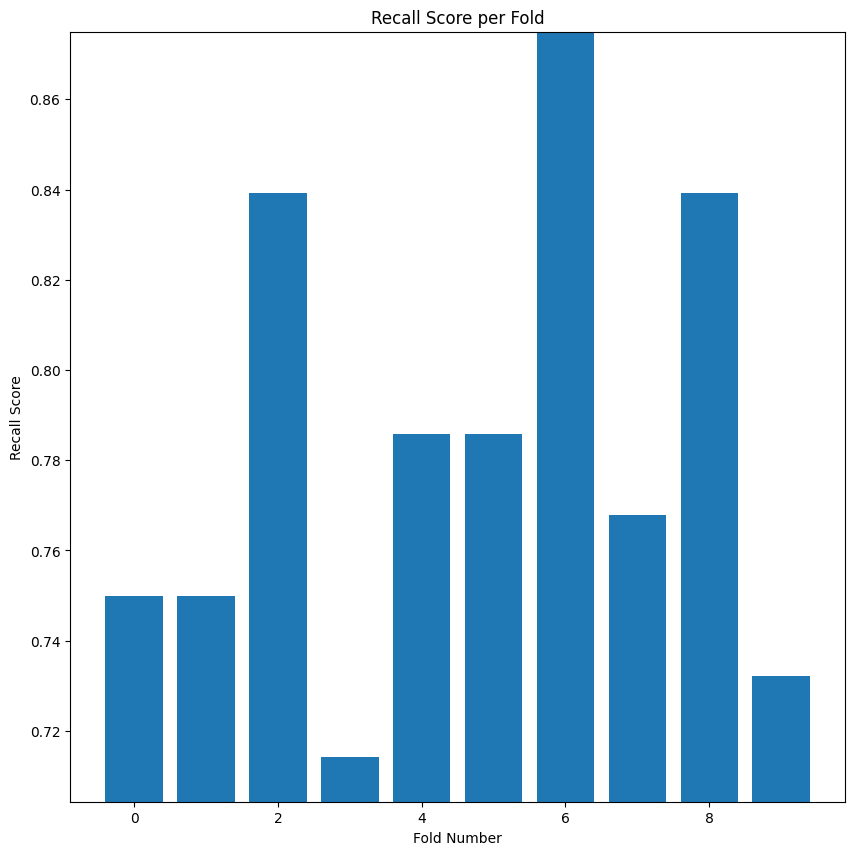

In [10]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
clf.fit(X,y)

#select cross validation
cv = StratifiedShuffleSplit(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(recall_score)

# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
)

plt.figure(figsize=(10,10))
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# title and labels
plt.title('Recall Score per Fold')
plt.ylabel('Recall Score')
plt.xlabel('Fold Number')

print(f'Recall score average: {per_fold_eval_criteria.mean()*100}')
plt.show()

In [11]:
cross_columns = [['Platform', 'Genre']]
cross_columns2 = [['Developer', 'Publisher']]
cross_columns3 = [['Platform', 'Publisher'], ['Platform', 'Developer'], ['Platform', 'Genre']]

# cross each set of columns in the list above
cross_col_df_names1 = []
cross_col_df_names2 = []
cross_col_df_names3 = []
def fill_cross_columns(cross_columns):
    cross_col_df_names = []
    for cols_list in cross_columns:
        # encode as ints for the embedding
        enc = LabelEncoder()
        
        # 1. create crossed labels by join operation
        X_crossed_train = df_imputed[cols_list].apply(lambda x: '_'.join(x), axis=1)
        
        # get a nice name for this new crossed column
        cross_col_name = '_'.join(cols_list)
        
        # 2. encode as integers
        enc.fit(np.hstack((X_crossed_train.to_numpy())))
        
        # 3. Save into dataframe with new name
        df_imputed[cross_col_name] = enc.transform(X_crossed_train)
        
        # keep track of the new names of the crossed columns
        cross_col_df_names.append(cross_col_name) 

    return cross_col_df_names

cross_col_df_names1 = fill_cross_columns(cross_columns)
cross_col_df_names2 = fill_cross_columns(cross_columns2)
cross_col_df_names3 = fill_cross_columns(cross_columns3)


In [12]:
df_imputed.head()

,Platform,Year,Genre,Publisher,NA_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Platform_int,Year_int,Genre_int,Publisher_int,Developer_int,Rating_int,Platform_Genre,Developer_Publisher,Platform_Publisher,Platform_Developer
0,Wii,2006.0,Sports,Nintendo,42.349741,12.887711,1,0.413044,1.148059,0.565602,...,12,14,10,160,771,1,160,1419,663,2434
2,Wii,2008.0,Racing,Nintendo,15.802014,12.957265,1,0.845709,2.292536,0.773959,...,12,16,6,160,771,1,156,1419,663,2434
3,Wii,2009.0,Sports,Nintendo,15.729649,11.183651,1,0.701487,2.292536,0.565602,...,12,17,10,160,771,1,160,1419,663,2434
6,DS,2006.0,Platform,Nintendo,11.253338,22.381762,1,1.350484,1.876363,0.912863,...,2,14,4,160,771,1,24,1419,88,266
7,Wii,2006.0,Misc,Nintendo,14.023895,9.966465,1,-0.884950,0.627843,-0.406731,...,12,14,3,160,771,1,153,1419,663,2434


In [13]:
cat_X = df_imputed[categorical_headers_ints].to_numpy()
cat_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cat_X,cat_y): 
    X_train_cat = cat_X[df_train]
    y_train_cat = cat_y[df_train]
    
    X_test_cat = cat_X[df_test]
    y_test_cat = cat_y[df_test]
    
num_X = df_imputed[numerical_columns].to_numpy()
num_y = df_imputed['Global_Sales'].values # get the labels we want

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(num_X,num_y): 
    X_train_num = num_X[df_train]
    y_train_num = num_y[df_train]
    
    X_test_num = num_X[df_test]
    y_test_num = num_y[df_test]


cross_X = df_imputed[cross_col_df_names1].to_numpy()
cross_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cross_X,cross_y): 
    X_train_cross = cross_X[df_train]
    y_train_cross = cross_y[df_train]
    
    X_test_cross = cross_X[df_test]
    y_test_cross = cross_y[df_test]

In [14]:
for col in categorical_columns:
    vals = df_imputed[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

Platform has 17 unique values:
['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']
Year has 25 unique values:
[2006. 2008. 2009. 2005. 2007. 2010. 2013. 2004. 2002. 2001. 2011. 2012.
 2014. 1997. 1999. 2015. 2016. 2003. 1998. 1996. 2000. 1994. 1985. 1992.
 1988.]
Genre has 12 unique values:
['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']
Publisher has 262 unique values:
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'SquareSoft' 'GT Interactive'
 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 '505 Games' 'Capcom' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'RedOctane' 'Atari' 'Eidos Interactive'
 'Namco Bandai Games' 'Vivendi Games' 'MTV Games' 'Sega' 'THQ'
 'Di

In [15]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

print(tf.__version__)
print(keras.__version__)

2.13.0
2.12.0


In [16]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

#import embedding layer
from tensorflow.keras.layers import Embedding

#import concatenate layer
from tensorflow.keras.layers import concatenate

In [17]:
# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_cross.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names1):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [18]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 categorical_input (InputLayer)  [(None, 6)]         0           []                               
                                                                                                  
 tf.compat.v1.gather_1 (TFOpLam  (None,)             0           ['categorical_input[0][0]']      
 bda)                                                                                             
                                                                                                  
 tf.compat.v1.gather_2 (TFOpLam  (None,)             0           ['categorical_input[0][0]']      
 bda)                                                                                             
                                                                                              

In [19]:
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import AUC

In [20]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))


Epoch 1/15
192/192 [==============================] - 0s 774us/step - loss: 0.2428 - accuracy: 0.7558 - val_loss: 0.2365 - val_accuracy: 0.8768
Epoch 2/15
192/192 [==============================] - 0s 429us/step - loss: 0.2355 - accuracy: 0.8839 - val_loss: 0.2307 - val_accuracy: 0.9150
Epoch 3/15
192/192 [==============================] - 0s 421us/step - loss: 0.2300 - accuracy: 0.9118 - val_loss: 0.2255 - val_accuracy: 0.9179
Epoch 4/15
192/192 [==============================] - 0s 425us/step - loss: 0.2248 - accuracy: 0.9171 - val_loss: 0.2204 - val_accuracy: 0.9179
Epoch 5/15
192/192 [==============================] - 0s 451us/step - loss: 0.2196 - accuracy: 0.9175 - val_loss: 0.2149 - val_accuracy: 0.9179
Epoch 6/15
192/192 [==============================] - 0s 437us/step - loss: 0.2141 - accuracy: 0.9175 - val_loss: 0.2092 - val_accuracy: 0.9179
Epoch 7/15
192/192 [==============================] - 0s 421us/step - loss: 0.2083 - accuracy: 0.9175 - val_loss: 0.2030 - val_accuracy:

In [21]:
history = model.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))

In [22]:
all_f1_scores = []
all_acc_scores = []

In [23]:
yhat = np.round(model.predict([X_test_cross,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

#save the f1 and accuracy scores from the classification report
f1_score = mt.classification_report(y_test,yhat).split()[7]
all_f1_scores.append(f1_score)
accuracy_score = mt.accuracy_score(y_test,yhat)
all_acc_scores.append(accuracy_score)
print(f1_score)
print(accuracy_score)

22/22 [==============================] - 0s 374us/step
[[626   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       626
           1       0.00      0.00      0.00        56

    accuracy                           0.92       682
   macro avg       0.46      0.50      0.48       682
weighted avg       0.84      0.92      0.88       682

0.96
0.9178885630498533


Text(0.5, 0, 'epochs')

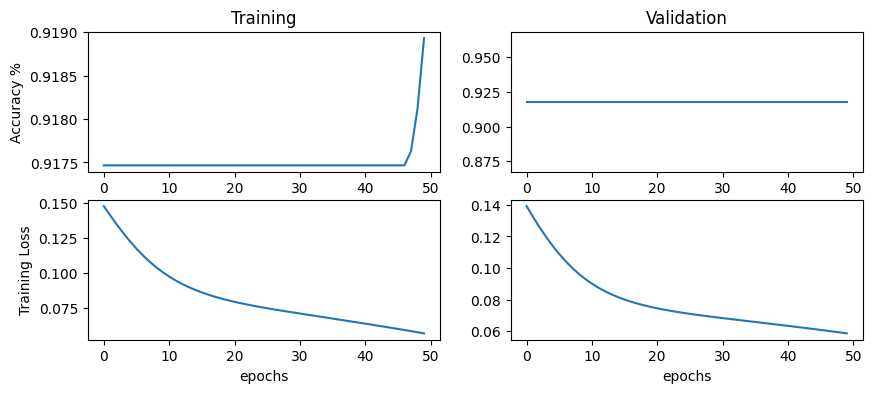

In [24]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [25]:
cat_X = df_imputed[categorical_headers_ints].to_numpy()
cat_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cat_X,cat_y): 
    X_train_cat = cat_X[df_train]
    y_train_cat = cat_y[df_train]
    
    X_test_cat = cat_X[df_test]
    y_test_cat = cat_y[df_test]
    
num_X = df_imputed[numerical_columns].to_numpy()
num_y = df_imputed['Global_Sales'].values # get the labels we want

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(num_X,num_y): 
    X_train_num = num_X[df_train]
    y_train_num = num_y[df_train]
    
    X_test_num = num_X[df_test]
    y_test_num = num_y[df_test]

cross_X = df_imputed[cross_col_df_names2].to_numpy()
cross_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cross_X,cross_y): 
    X_train_cross = cross_X[df_train]
    y_train_cross = cross_y[df_train]
    
    X_test_cross = cross_X[df_test]
    y_test_cross = cross_y[df_test]

In [26]:
# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_cross.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names2):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=5,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=2,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=1,activation='relu', name='deep3')(deep_branch)

    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model2 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

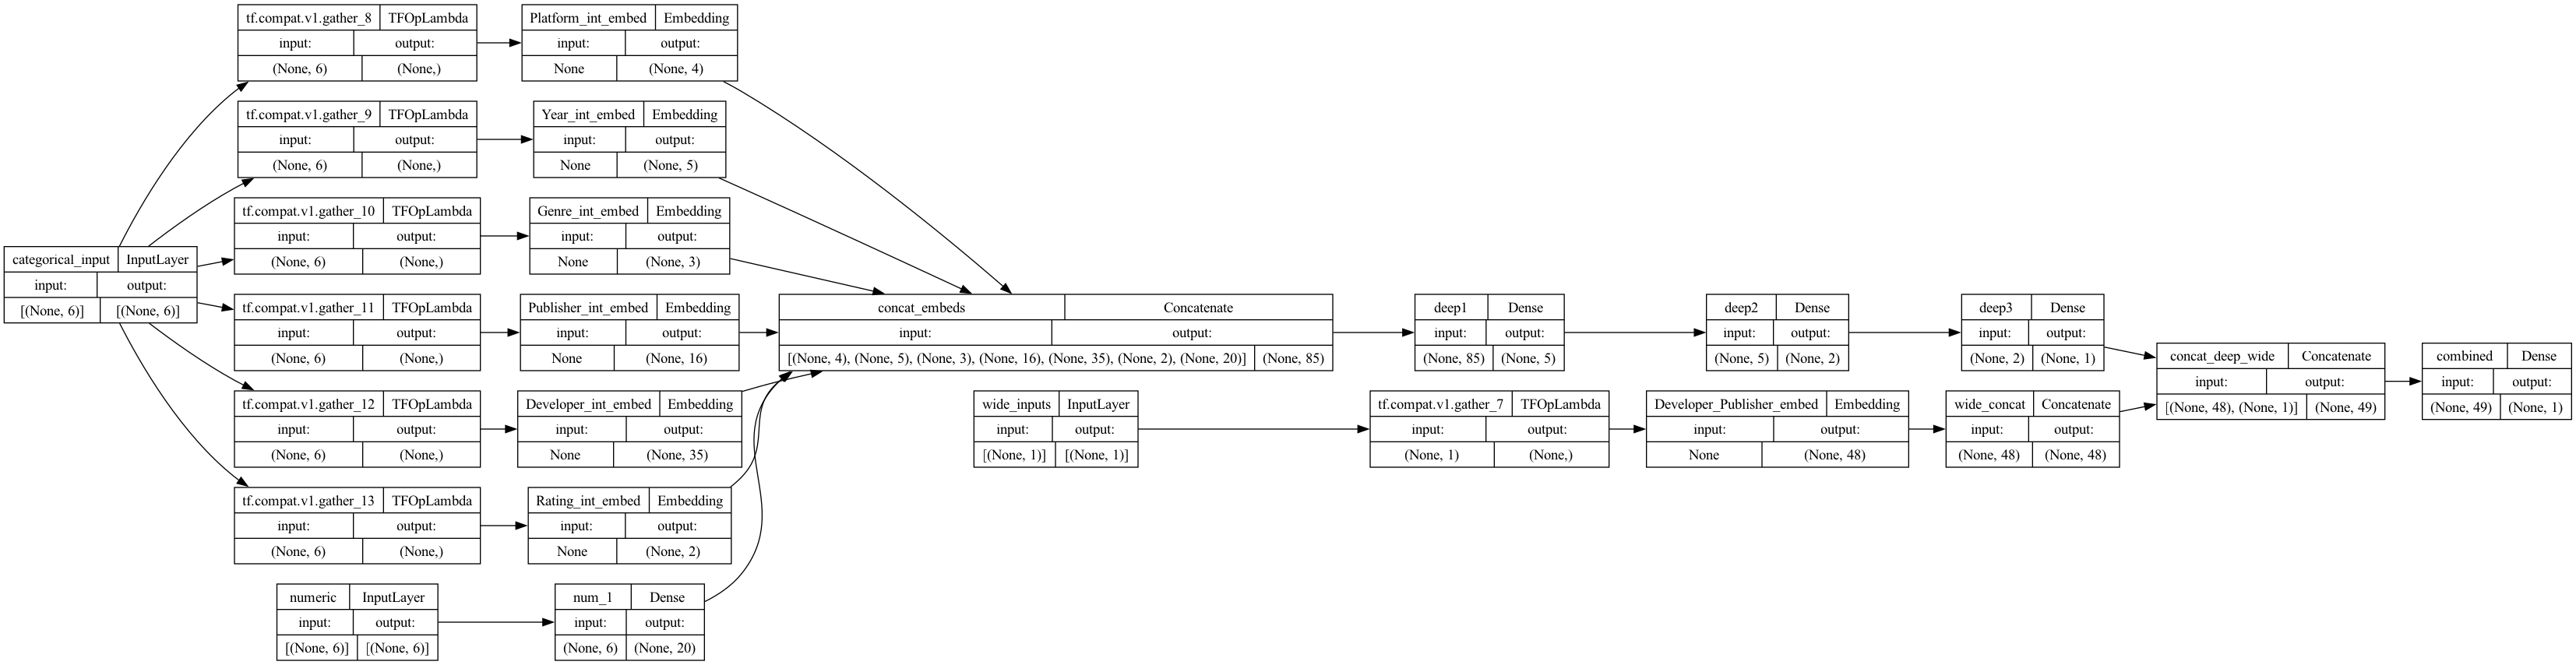

In [27]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [28]:
%%time

model2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model2.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))


Epoch 1/15
192/192 [==============================] - 0s 808us/step - loss: 0.2473 - accuracy: 0.6080 - val_loss: 0.2446 - val_accuracy: 0.7067
Epoch 2/15
192/192 [==============================] - 0s 630us/step - loss: 0.2435 - accuracy: 0.7335 - val_loss: 0.2417 - val_accuracy: 0.7918
Epoch 3/15
192/192 [==============================] - 0s 701us/step - loss: 0.2409 - accuracy: 0.7864 - val_loss: 0.2395 - val_accuracy: 0.8299
Epoch 4/15
192/192 [==============================] - 0s 538us/step - loss: 0.2388 - accuracy: 0.8244 - val_loss: 0.2376 - val_accuracy: 0.8578
Epoch 5/15
192/192 [==============================] - 0s 519us/step - loss: 0.2369 - accuracy: 0.8587 - val_loss: 0.2359 - val_accuracy: 0.8783
Epoch 6/15
192/192 [==============================] - 0s 993us/step - loss: 0.2351 - accuracy: 0.8768 - val_loss: 0.2343 - val_accuracy: 0.8886
Epoch 7/15
192/192 [==============================] - 0s 480us/step - loss: 0.2334 - accuracy: 0.8934 - val_loss: 0.2327 - val_accuracy:

In [29]:
history = model2.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))

In [30]:
yhat2 = np.round(model2.predict([X_test_cross,X_test_cat,X_test_num]))
# print(mt.confusion_matrix(y_test,yhat2))
print(mt.classification_report(y_test,yhat2))

#save the f1 and accuracy scores from the classification report
f1_score = mt.classification_report(y_test,yhat2).split()[7]
all_f1_scores.append(f1_score)
accuracy_score = mt.accuracy_score(y_test,yhat2)
all_acc_scores.append(accuracy_score)
print(f1_score)
print(accuracy_score)

22/22 [==============================] - 0s 336us/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       626
           1       0.00      0.00      0.00        56

    accuracy                           0.92       682
   macro avg       0.46      0.50      0.48       682
weighted avg       0.84      0.92      0.88       682

0.96
0.9178885630498533


Text(0.5, 0, 'epochs')

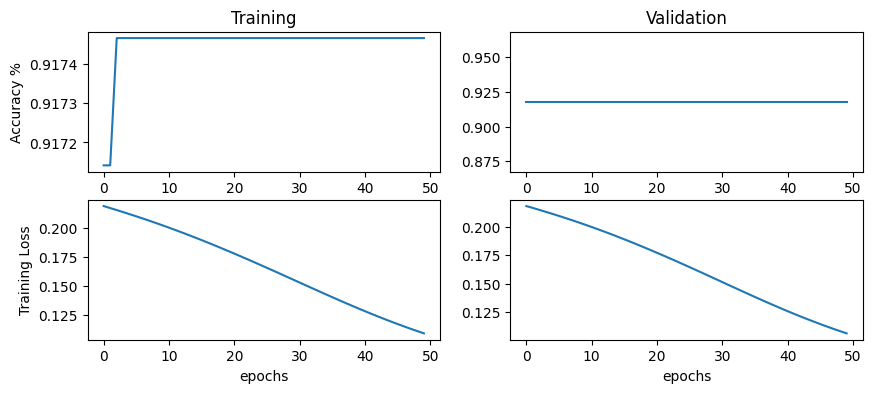

In [31]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [32]:
cat_X = df_imputed[categorical_headers_ints].to_numpy()
cat_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cat_X,cat_y): 
    X_train_cat = cat_X[df_train]
    y_train_cat = cat_y[df_train]
    
    X_test_cat = cat_X[df_test]
    y_test_cat = cat_y[df_test]
    
num_X = df_imputed[numerical_columns].to_numpy()
num_y = df_imputed['Global_Sales'].values # get the labels we want

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(num_X,num_y): 
    X_train_num = num_X[df_train]
    y_train_num = num_y[df_train]
    
    X_test_num = num_X[df_test]
    y_test_num = num_y[df_test]

cross_X = df_imputed[cross_col_df_names3].to_numpy()
cross_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cross_X,cross_y): 
    X_train_cross = cross_X[df_train]
    y_train_cross = cross_y[df_train]
    
    X_test_cross = cross_X[df_test]
    y_test_cross = cross_y[df_test]

In [33]:
# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_cross.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names3):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=1,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=5,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=2,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model3 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [34]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 categorical_input (InputLayer)  [(None, 6)]         0           []                               
                                                                                                  
 tf.compat.v1.gather_17 (TFOpLa  (None,)             0           ['categorical_input[0][0]']      
 mbda)                                                                                            
                                                                                                  
 tf.compat.v1.gather_18 (TFOpLa  (None,)             0           ['categorical_input[0][0]']      
 mbda)                                                                                            
                                                                                            

 combined (Dense)               (None, 1)            103         ['concat_deep_wide[0][0]']       
                                                                                                  
Total params: 264,159
Trainable params: 264,159
Non-trainable params: 0
__________________________________________________________________________________________________


In [35]:
%%time

model3.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model3.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))


Epoch 1/15
192/192 [==============================] - 0s 718us/step - loss: 0.2458 - accuracy: 0.6723 - val_loss: 0.2439 - val_accuracy: 0.7214
Epoch 2/15
192/192 [==============================] - 0s 458us/step - loss: 0.2417 - accuracy: 0.7850 - val_loss: 0.2406 - val_accuracy: 0.8123
Epoch 3/15
192/192 [==============================] - 0s 440us/step - loss: 0.2387 - accuracy: 0.8424 - val_loss: 0.2378 - val_accuracy: 0.8519
Epoch 4/15
192/192 [==============================] - 0s 440us/step - loss: 0.2361 - accuracy: 0.8812 - val_loss: 0.2354 - val_accuracy: 0.8886
Epoch 5/15
192/192 [==============================] - 0s 439us/step - loss: 0.2336 - accuracy: 0.9012 - val_loss: 0.2331 - val_accuracy: 0.8988
Epoch 6/15
192/192 [==============================] - 0s 440us/step - loss: 0.2312 - accuracy: 0.9101 - val_loss: 0.2309 - val_accuracy: 0.9076
Epoch 7/15
192/192 [==============================] - 0s 440us/step - loss: 0.2289 - accuracy: 0.9145 - val_loss: 0.2287 - val_accuracy:

In [36]:
history = model3.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))

In [37]:
yhat3 = np.round(model3.predict([X_test_cross,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat3))
print(mt.classification_report(y_test,yhat3))

#save the f1 and accuracy scores from the classification report
f1_score = mt.classification_report(y_test,yhat3).split()[7]
all_f1_scores.append(f1_score)
accuracy_score = mt.accuracy_score(y_test,yhat3)
all_acc_scores.append(accuracy_score)
print(f1_score)
print(accuracy_score)

22/22 [==============================] - 0s 349us/step
[[626   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       626
           1       0.00      0.00      0.00        56

    accuracy                           0.92       682
   macro avg       0.46      0.50      0.48       682
weighted avg       0.84      0.92      0.88       682

0.96
0.9178885630498533


Text(0.5, 0, 'epochs')

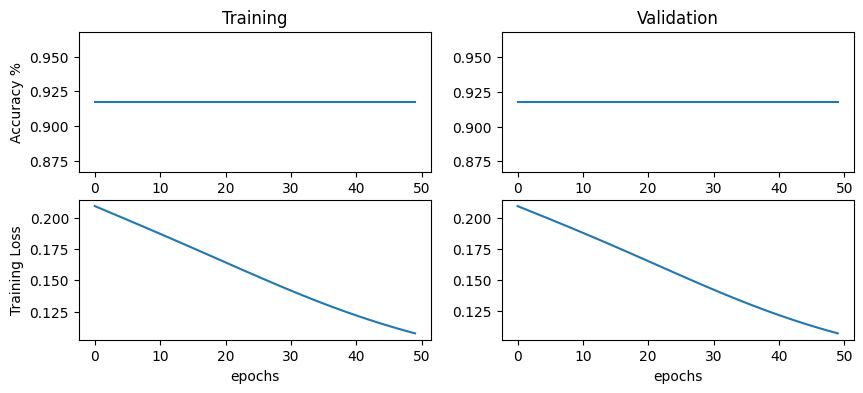

In [38]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [39]:
cat_X = df_imputed[categorical_headers_ints].to_numpy()
cat_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cat_X,cat_y): 
    X_train_cat = cat_X[df_train]
    y_train_cat = cat_y[df_train]
    
    X_test_cat = cat_X[df_test]
    y_test_cat = cat_y[df_test]
    
num_X = df_imputed[numerical_columns].to_numpy()
num_y = df_imputed['Global_Sales'].values # get the labels we want

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(num_X,num_y): 
    X_train_num = num_X[df_train]
    y_train_num = num_y[df_train]
    
    X_test_num = num_X[df_test]
    y_test_num = num_y[df_test]

cross_X = df_imputed[cross_col_df_names1].to_numpy()
cross_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cross_X,cross_y): 
    X_train_cross = cross_X[df_train]
    y_train_cross = cross_y[df_train]
    
    X_test_cross = cross_X[df_test]
    y_test_cross = cross_y[df_test]

In [40]:
# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_cross.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names1):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=1,activation='relu', name='deep1')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model4 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [41]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model4, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 categorical_input (InputLayer)  [(None, 6)]         0           []                               
                                                                                                  
 wide_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 tf.compat.v1.gather_24 (TFOpLa  (None,)             0           ['categorical_input[0][0]']      
 mbda)                                                                                            
                                                                                                  
 tf.compat.v1.gather_25 (TFOpLa  (None,)             0           ['categorical_input[0][0]']

In [42]:
%%time

model4.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model4.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))


Epoch 1/15
192/192 [==============================] - 0s 669us/step - loss: 0.2487 - accuracy: 0.5865 - val_loss: 0.2462 - val_accuracy: 0.7141
Epoch 2/15
192/192 [==============================] - 0s 416us/step - loss: 0.2450 - accuracy: 0.7684 - val_loss: 0.2434 - val_accuracy: 0.8314
Epoch 3/15
192/192 [==============================] - 0s 408us/step - loss: 0.2425 - accuracy: 0.8346 - val_loss: 0.2413 - val_accuracy: 0.8680
Epoch 4/15
192/192 [==============================] - 0s 423us/step - loss: 0.2404 - accuracy: 0.8644 - val_loss: 0.2394 - val_accuracy: 0.8930
Epoch 5/15
192/192 [==============================] - 0s 426us/step - loss: 0.2386 - accuracy: 0.8974 - val_loss: 0.2378 - val_accuracy: 0.9076
Epoch 6/15
192/192 [==============================] - 0s 435us/step - loss: 0.2370 - accuracy: 0.9082 - val_loss: 0.2363 - val_accuracy: 0.9091
Epoch 7/15
192/192 [==============================] - 0s 415us/step - loss: 0.2355 - accuracy: 0.9106 - val_loss: 0.2349 - val_accuracy:

In [43]:
history = model4.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))

In [44]:
yhat4 = np.round(model4.predict([X_test_cross,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat4))
print(mt.classification_report(y_test,yhat4))

#save the f1 and accuracy scores from the classification report
f1_score = mt.classification_report(y_test,yhat4).split()[7]
all_f1_scores.append(f1_score)
accuracy_score = mt.accuracy_score(y_test,yhat4)
all_acc_scores.append(accuracy_score)
print(f1_score)
print(accuracy_score)

22/22 [==============================] - 0s 470us/step
[[626   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       626
           1       0.00      0.00      0.00        56

    accuracy                           0.92       682
   macro avg       0.46      0.50      0.48       682
weighted avg       0.84      0.92      0.88       682

0.96
0.9178885630498533


Text(0.5, 0, 'epochs')

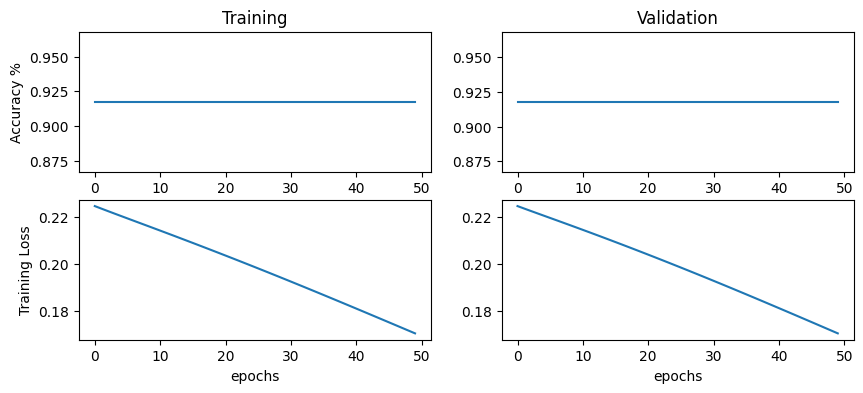

In [45]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [46]:
cat_X = df_imputed[categorical_headers_ints].to_numpy()
cat_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cat_X,cat_y): 
    X_train_cat = cat_X[df_train]
    y_train_cat = cat_y[df_train]
    
    X_test_cat = cat_X[df_test]
    y_test_cat = cat_y[df_test]
    
num_X = df_imputed[numerical_columns].to_numpy()
num_y = df_imputed['Global_Sales'].values # get the labels we want

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(num_X,num_y): 
    X_train_num = num_X[df_train]
    y_train_num = num_y[df_train]
    
    X_test_num = num_X[df_test]
    y_test_num = num_y[df_test]

cross_X = df_imputed[cross_col_df_names1].to_numpy()
cross_y = df_imputed['Global_Sales'].values

# the indices are the rows used for training and testing in each iteration
for df_train, df_test in cv_object.split(cross_X,cross_y): 
    X_train_cross = cross_X[df_train]
    y_train_cross = cross_y[df_train]
    
    X_test_cross = cross_X[df_test]
    y_test_cross = cross_y[df_test]

In [47]:
# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_cross.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names1):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=5,activation='relu', name='deep5')(deep_branch)

    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model5 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [48]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model5, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 categorical_input (InputLayer)  [(None, 6)]         0           []                               
                                                                                                  
 tf.compat.v1.gather_31 (TFOpLa  (None,)             0           ['categorical_input[0][0]']      
 mbda)                                                                                            
                                                                                                  
 tf.compat.v1.gather_32 (TFOpLa  (None,)             0           ['categorical_input[0][0]']      
 mbda)                                                                                            
                                                                                            

In [49]:
%%time

model5.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model5.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))


Epoch 1/15
192/192 [==============================] - 0s 907us/step - loss: 0.2441 - accuracy: 0.7744 - val_loss: 0.2407 - val_accuracy: 0.9179
Epoch 2/15
192/192 [==============================] - 0s 534us/step - loss: 0.2367 - accuracy: 0.9194 - val_loss: 0.2348 - val_accuracy: 0.9282
Epoch 3/15
192/192 [==============================] - 0s 547us/step - loss: 0.2310 - accuracy: 0.9258 - val_loss: 0.2293 - val_accuracy: 0.9252
Epoch 4/15
192/192 [==============================] - 0s 582us/step - loss: 0.2255 - accuracy: 0.9261 - val_loss: 0.2240 - val_accuracy: 0.9208
Epoch 5/15
192/192 [==============================] - 0s 597us/step - loss: 0.2201 - accuracy: 0.9266 - val_loss: 0.2186 - val_accuracy: 0.9194
Epoch 6/15
192/192 [==============================] - 0s 563us/step - loss: 0.2147 - accuracy: 0.9259 - val_loss: 0.2131 - val_accuracy: 0.9194
Epoch 7/15
192/192 [==============================] - 0s 478us/step - loss: 0.2092 - accuracy: 0.9240 - val_loss: 0.2074 - val_accuracy:

In [50]:
history = model5.fit([X_train_cross,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_cross,X_test_cat,X_test_num],y_test))

In [51]:
yhat5 = np.round(model5.predict([X_test_cross,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat5))
print(mt.classification_report(y_test,yhat5))

#save the f1 and accuracy scores from the classification report
f1_score = mt.classification_report(y_test,yhat5).split()[7]
all_f1_scores.append(f1_score)
accuracy_score = mt.accuracy_score(y_test,yhat5)
all_acc_scores.append(accuracy_score)
print(f1_score)
print(accuracy_score)

22/22 [==============================] - 0s 313us/step
[[626   0]
 [ 40  16]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       626
           1       1.00      0.29      0.44        56

    accuracy                           0.94       682
   macro avg       0.97      0.64      0.71       682
weighted avg       0.94      0.94      0.93       682

0.97
0.9413489736070382


Text(0.5, 0, 'epochs')

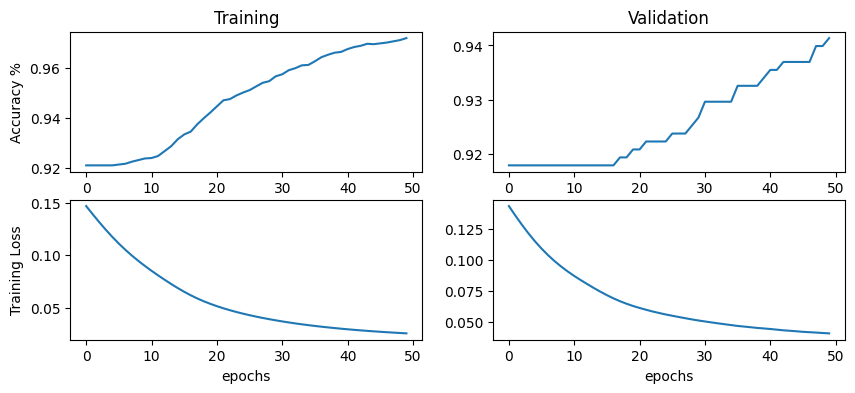

In [52]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [53]:
# use a standard multi-layer perceptron to predict the sales
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, f1_score

#use the multi-layer perceptron to predict the sales
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

#predict the sales
yhat_mlp = mlp.predict(X_test)

#calculate the F1 score
print('F1 score: ', f1_score(y_test, yhat_mlp.round(), average='weighted'))
#compare the f1 score above to the f1 score of our first model
print('F1 score: ', f1_score(y_test, yhat.round(), average='weighted'))

F1 score:  0.9102416380114079
F1 score:  0.8785905817571991


In [54]:
for layer in model.layers:
    if 'wide' in layer.name:
        pass
    else: 
        weights = layer.get_weights()
print(weights)


[array([[ 0.30166766],
       [-0.10746147],
       [-0.4719751 ],
       [-0.43184495],
       [ 0.33288434],
       [ 0.00812478],
       [ 0.07115105],
       [ 0.2639744 ],
       [ 0.47223052],
       [ 0.10187995],
       [-0.08925816],
       [-0.15544273],
       [-0.06892041],
       [ 0.064698  ],
       [-0.24232996],
       [-0.03461939],
       [ 0.14343753],
       [-0.25291297],
       [ 0.3686551 ],
       [ 0.37605   ],
       [-0.35075638],
       [ 0.2848902 ],
       [-0.22073212],
       [ 0.3826906 ]], dtype=float32), array([-0.12149398], dtype=float32)]


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

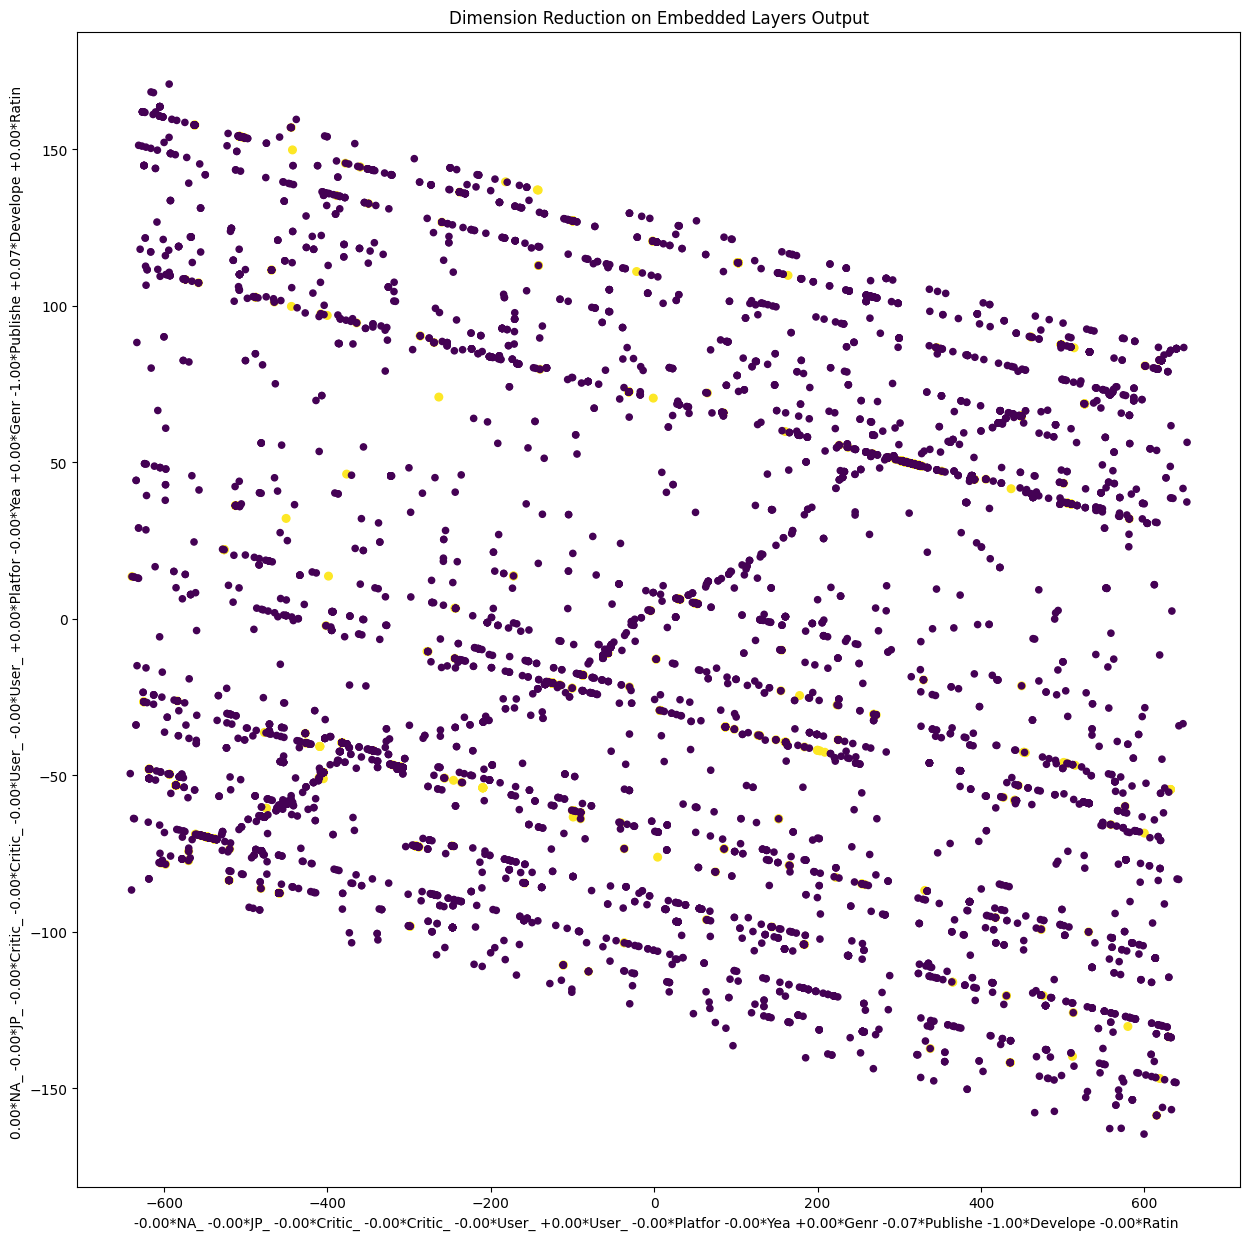

In [56]:
import seaborn as sns

cmap = sns.set(style="darkgrid") 
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
plt.style.use('default')
pca_weight_strings = get_feature_names_from_weights(pca.components_, feature_headers) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
plt.figure(figsize=(15,15))
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])

plt.title("Dimension Reduction on Embedded Layers Output")

ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)

0.9389442815249267
0.04211143695014663
0.9389442815249267
0.04211143695014663
0.9389442815249267
0.04211143695014663
0.9389442815249267
0.04211143695014663
0.9556744868035191
0.028651026392961798


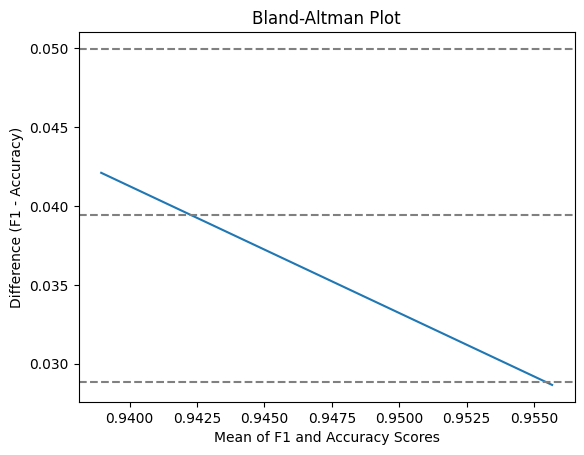

In [57]:
import numpy as np
import matplotlib.pyplot as plt

mean_scores = []
diff_scores = []
for i in range(0, len(all_f1_scores)):
    mean_scores.append((float(all_f1_scores[i]) + float(all_acc_scores[i])) / 2)
    diff_scores.append(float(all_f1_scores[i]) - float(all_acc_scores[i]))
    print(mean_scores[i])
    print(diff_scores[i])


#get the mean of every score in mean_scores
mean_temp = np.array(diff_scores)
mean_diff = mean_temp.mean()
std_diff = mean_temp.std()

# mean_diff = diff_scores.mean()
# std_diff = diff_scores.std()

#make a line plot of the using the mean_scores and diff_scores

plt.plot(mean_scores, diff_scores)
plt.axhline(mean_diff, color='gray', linestyle='--')
plt.axhline(mean_diff + 1.96*std_diff, color='gray', linestyle='--')
plt.axhline(mean_diff - 1.96*std_diff, color='gray', linestyle='--')
plt.xlabel('Mean of F1 and Accuracy Scores')
plt.ylabel('Difference (F1 - Accuracy)')
plt.title('Bland-Altman Plot')
plt.show()